### **Data loading and Exploration**

In [ ]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
#use pandas to read the data
data=pd.read_excel('/content/drive/My Drive/expansion_coeff.xlsx')  #since the data is in .xlsx format use pd.read_excel()
data.head() #display the first 5 data values

,Temperature,Coefficient
0,80,0.000006
1,60,0.000006
2,40,0.000006
3,20,0.000006
4,0,0.000006


In [ ]:
#separate the two columns into dependent and independent variables using the data.iloc[].values
#iloc is integer based location indexing for selecting particular rows or columns in the Dataframe. values returns the value of the indexed location
X = data.iloc[:, 0:1].values 
Y = 1e6*data.iloc[:, 1].values
n_samples=len(X)  #find total number of samples

#some exploration on the dataset
print("Maximum Temperature: ",X.max())
print("Minimum Temperature: ",X.min())
print("Maximum Coefficient: ",Y.max())
print("Minimum Coefficient: ",Y.min())

print("Mean Temperature: ",X.mean())
print("Mean Coefficient: ",Y.mean())

#correlation between the input and output
print(data.corr())

Maximum Temperature:  80
Minimum Temperature:  -340
Maximum Coefficient:  6.47
Minimum Coefficient:  2.4499999999999997
Mean Temperature:  -130.0
Mean Coefficient:  4.804545454545455
             Temperature  Coefficient
Temperature     1.000000     0.989108
Coefficient     0.989108     1.000000


Split the data into Training and Validation Set. The validation set will be used to validate the performance of the model on unseen data.

In [ ]:
#split the data into train and validate dataset. Sklearn provides a built in function which splits a given dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,shuffle=False)  #test data will be 33% of the total data
train_samples=len(X_train)
test_samples=len(X_test)

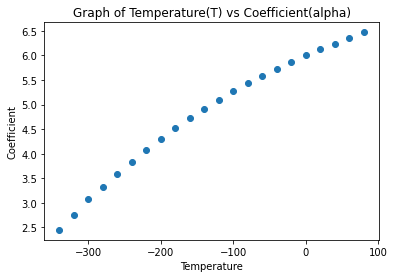

In [ ]:
#plot the graph between the dependent(y) and independent(x) variables to understand the relationship between them
plt.figure()
plt.xlabel("Temperature")
plt.ylabel("Coefficient")
plt.title("Graph of Temperature(T) vs Coefficient(alpha)")
plt.scatter(X,Y)

## **Linear Regression using Least Squares**

Use sci-kit learn's built in function LinearRegression to import a pre-built regression model. This model makes use of Least Squares for fitting the data. Least Squares is a numerical method for optimising the parameters of the model.

In [ ]:
#Fit the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()    #define an instance of the LinearRegression class. 
lin_reg.fit(X_train, Y_train)               #fit the X and Y datapoints to the model
Y_hat=lin_reg.predict(X_train)        #predict the output using the fitted model

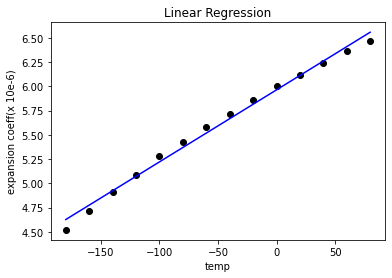

In [ ]:
# Visualise the Linear Regression Result
plt.scatter(X_train, Y_train, color = 'black')
plt.plot(X_train, Y_hat, color = 'blue') 
plt.title('Linear Regression') 
plt.xlabel('temp')
plt.ylabel('expansion coeff(x 10e-6)')
plt.show()

Model Evaluation using R2 value

In [ ]:
#evaluation metrics- We will use the R2 value to evaluate the performanc e of the trained model.
from sklearn.metrics import r2_score
r2_score(Y_train, Y_hat)

0.9915546353599576

Use the model to predict the output for Validation dataset.

In [ ]:
Y_hat_val= lin_reg.predict(X_test)

Model Loss on train and validation data

In [ ]:
#the cost function used is the Mean Square Error
cost_train=np.mean((Y_train-Y_hat)**2)/train_samples
print("training loss: ",cost_train)

cost_val=np.mean((Y_test-Y_hat_val)**2)/test_samples
print("Validation Loss:",cost_val)

training loss:  0.00021822157434402416
Validation Loss: 0.044294005102040714


## **Polynomial Regression using Least Squares**

Now we will build a Polynomial Regression model for the same data. From the visualization of the data it was clear that the relationship between x and y was non-linear. Hence a Polynomial Regression would give a better approximation of the relationship.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
#Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.
#For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]. 

poly_reg = PolynomialFeatures(degree = 2) 
#define an instance of PolynomialFeatures. The argument degree specifies the order of the polynomial desired. 
X_poly = poly_reg.fit_transform(X_train)      #return the features in the form [1, X, X^2] 
lin_reg_2 = LinearRegression()          #define an instance of Linear Regression
lin_reg_2.fit(X_poly, Y_train)                #fit the new features and Y to get the trained model
Y_hat=lin_reg_2.predict(X_poly)         #predict the output 

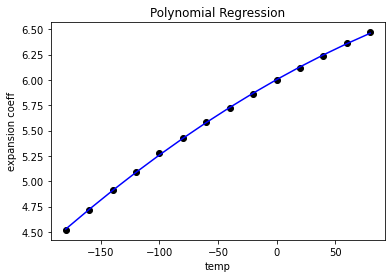

In [ ]:
# Visualise the quadratic Polynomial Regression Results
plt.scatter(X_train, Y_train, color = 'black')
plt.plot(X_train, Y_hat, color = 'blue') 
plt.title('Polynomial Regression')
plt.xlabel('temp')
plt.ylabel('expansion coeff')
plt.show()

In [ ]:
#evaluation metrics- We will use the R2 value to evaluate the performanc e of the trained model.
from sklearn.metrics import r2_score
r2_score(Y_train, Y_hat)

0.9998190371997895

In [ ]:
X_test_poly=poly_reg.fit_transform(X_test) 
Y_hat_val= lin_reg_2.predict(X_test_poly)
#the cost function used is the Mean Square Error
cost_train=np.mean((Y_train-Y_hat)**2)/train_samples
print("training loss: ",cost_train)

cost_val=np.mean((Y_test-Y_hat_val)**2)/test_samples
print("Validation Loss:",cost_val)

training loss:  4.675936308589409e-06
Validation Loss: 0.0023589655536745175


## **Linear Regression using Gradient Descent**

Gradient Descent Algorithm to find the optimum parameters of the regression model. We will be using the pre-built SGDRegressor function which builds a Regression model and optimises using the Stochastic Gradient Descent Algorithm. 

SGDRegressor takes as argument various inputs. Some of the important ones are listed here:
1. loss - specify the loss function to use for optimisation. The possible values are ‘squared_loss’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’
2. penalty - the penalty term to be used for regularisation. The values can be 'l1' or 'l2'
3. alpha - the regularisation coefficient. The higher the value, the stronger the regularization. 
4. learning_rate= Determine the learning rate of the optimisation. 'constant' means a constant learning rate will be used for the entire session. Other options are ‘optimal’, 'invscaling', 'adaptive'.
5. eta0 = the learning rate value.
6. max_iter - the maximum number of iterations to run.
7. tol - the tolerance value. If the loss is below the tolerance value or if the difference between the loss in subsequent iterations is less than the tolerance value, the training will be stopped.

An important thing in gradient descent is the normalisation of the input variables. Since input can have a very high and unequal range, it becomes advantageous to normalise the inputs between (0,1). This ensures that extreme inputs do not mess up the model prediction. 

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler  #scale the input by subtracting the mean and dividing by the standard deviation.

reg = make_pipeline(StandardScaler(),SGDRegressor(loss='squared_loss',penalty='l2', alpha=0.0001,learning_rate='constant', eta0=0.01,max_iter=1000, tol=1e-3))
#make pipeline builts a pipeline of commands to be executed one after the other on the same input. Provides a convinient way of defining a flow of commands.
#here the input will be first passed through the StandardScalar function and then the output will be passed to the SGDRegressor.

reg.fit(X_train, Y_train)   #fit the data to the model
Y_hat=reg.predict(X_train)    #predict the output

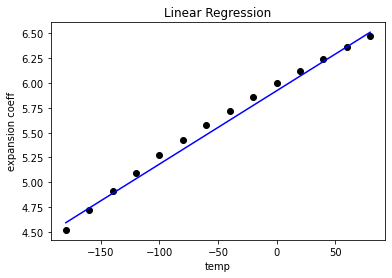

In [ ]:
# Visualise the Linear Regression Result
plt.scatter(X_train, Y_train, color = 'black')
plt.plot(X_train, Y_hat, color = 'blue') 
plt.title('Linear Regression') 
plt.xlabel('temp')
plt.ylabel('expansion coeff')
plt.show()

Model Evaluation and Prediction

In [ ]:
#evaluation metrics
from sklearn.metrics import r2_score
r2_score(Y_train, Y_hat)

0.9870525483982856

In [ ]:
#predict the output for T=-100 F and T=100 F
p1=reg.predict([[-100]])
p2=reg.predict([[100]])

print("The predicted coefficient at T=-100 F: ",p1*1e-6)
print("The predicted coefficient at T=100 F: ",p2*1e-6)

The predicted coefficient at T=-100 F:  [5.18349531e-06]
The predicted coefficient at T=100 F:  [6.66017623e-06]


Model Validation

In [ ]:
Y_hat_val= reg.predict(X_test)
#the cost function used is the Mean Square Error
cost_train=np.mean((Y_train-Y_hat)**2)/train_samples
print("training loss: ",cost_train)

cost_val=np.mean((Y_test-Y_hat_val)**2)/test_samples
print("Validation Loss:",cost_val)

training loss:  0.0003345519575167761
Validation Loss: 0.04050867183166062


Sensitivity Study- Effect of Learning Rate on model performance

learning rate=1, loss=1.4245250058555259
learning rate=0.1, loss=0.0016968569679889215
learning rate=0.01, loss=0.0014449532666556638
learning rate=0.001, loss=0.0030732224361481107
learning rate=0.0001, loss=0.021560407193052158
learning rate=1e-05, loss=0.7187134800928104


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Text(0.5, 1.0, 'loss vs learning rate')

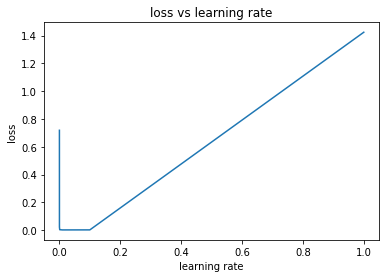

In [ ]:
loss=[]
learning_rate=[1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
for lr in learning_rate:
  reg = make_pipeline(StandardScaler(),SGDRegressor(loss='squared_loss',penalty='l2', 
                                                    alpha=0.0001,learning_rate='constant', 
                                                    eta0=lr, max_iter=1000, tol=1e-3))
  reg.fit(X, Y)   #fit the data to the model
  Y_hat=reg.predict(X)    #predict the output
  loss_value=np.mean((Y-Y_hat)**2)/n_samples
  loss.append(loss_value)
  print('learning rate='+str(lr) + ', loss='+str(loss_value))
plt.figure()
plt.plot(learning_rate,loss)
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('loss vs learning rate')

## **Polynomial Regression using Gradient Descent**

Perform SGD for  Polynomial Regression. We will use the same approach as used before for the Least Square method.

In [ ]:
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
reg = make_pipeline(StandardScaler(),SGDRegressor(loss='squared_loss',penalty='l2', alpha=0.0000001,learning_rate='constant', eta0=0.1,max_iter=1000, tol=1e-3))
reg.fit(X_poly, Y_train)
Y_hat=reg.predict(X_poly)

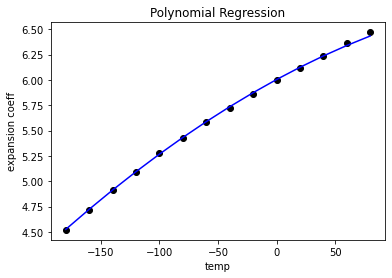

In [ ]:
# Visualise the Linear Regression Result
plt.scatter(X_train, Y_train, color = 'black')
plt.plot(X_train, Y_hat, color = 'blue') 
plt.title('Polynomial Regression') 
plt.xlabel('temp')
plt.ylabel('expansion coeff')
plt.show()

In [ ]:
#Validate on test data
X_test_poly=poly_reg.fit_transform(X_test) 
Y_hat_val= reg.predict(X_test_poly)
#the cost function used is the Mean Square Error
cost_train=np.mean((Y_train-Y_hat)**2)/train_samples
print("training loss: ",cost_train)

cost_val=np.mean((Y_test-Y_hat_val)**2)/test_samples
print("Validation Loss:",cost_val)

training loss:  1.3101524622713665e-05
Validation Loss: 0.0013940418337579602


Sensitivity Study- Effect of Model order on Performance of Polynomial Regression.

Text(0.5, 1.0, 'Loss vs model order')

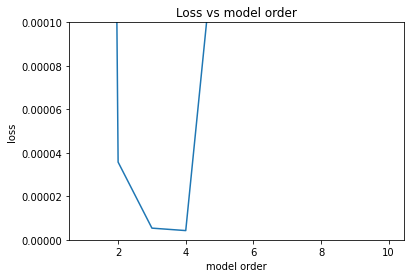

In [ ]:
loss=[]
order=[1,2,3,4,5,6,7,8,9,10]
for model_order in order:
  poly_reg = PolynomialFeatures(degree = model_order)
  X_poly = poly_reg.fit_transform(X) 
  reg = make_pipeline(StandardScaler(),SGDRegressor(loss='squared_loss',penalty='l2',
                                                    alpha=0.0000001,learning_rate='constant', 
                                                    eta0=0.1,max_iter=1000, tol=1e-3))
  reg.fit(X_poly, Y)
  Y_hat=reg.predict(X_poly)
  loss_value=np.mean((Y-Y_hat)**2)/n_samples
  loss.append(loss_value)

plt.plot(order,loss)
plt.ylim(0, 1e-4)
plt.xlabel("model order")
plt.ylabel("loss")
plt.title("Loss vs model order")